In [1]:
%load_ext watermark
%watermark -v -m -p numpy,scipy,pandas,matplotlib,sklearn,keras

Using TensorFlow backend.


CPython 3.5.2
IPython 6.2.1

numpy 1.14.0
scipy 1.0.0
pandas 0.22.0
matplotlib 2.1.1
sklearn 0.19.0
keras 2.1.3

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.9.60-linuxkit-aufs
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit


In [2]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           1980         378         246           0        1355        1382
Swap:          1023           2        1021


In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from ipywidgets import Image
from io import StringIO
import pydotplus 
from sklearn.tree import export_graphviz

In [4]:
import time
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(100)):
    time.sleep(0.05)

HBox(children=(IntProgress(value=0), HTML(value='')))

In [5]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
pd.DataFrame(X, columns=cancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
import xgboost, lightgbm

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
xgb = xgboost.XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)
prediction = xgb.predict_proba(X_test)

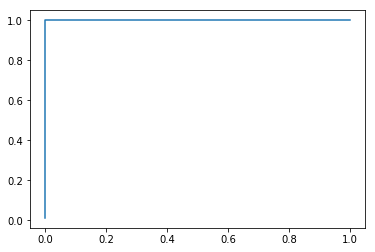

In [8]:
fpr, tpr, _ = roc_curve(y_test, prediction[:,1])
plt.plot(fpr, tpr);

In [9]:
import fbprophet

In [10]:
!vw --version

8.5.0


In [11]:
import keras

In [12]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [13]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, y_train)

In [15]:
dot_data = StringIO()
export_graphviz(tree, feature_names=cancer.feature_names, 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xb4\x00\x00\x01\xf1\x08\x02\x00\x00\x00:\x1a\xadL\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddgXTG\x17\x07\xf0\xb3\xf4\xde\xab\x88\xa2\x08\xa2"b\xc3\x86\x05\xb1wQ\x01\x8d\xbd\xd7\xa8X_lD\xc5\xde[\xecF!*\x88\xd8\x89\n\n*E\x10\x1b]EE\xa5\x97\xa5w\xd8}?\xdcd\xb3\xa1.\x82.\xe5\xff{\xf2aw\xee\xcc\xdc3\x97\x9bG\xeeaf.\x8b\xcb\xe5\x12\x00\x00\x00\x00\x00\x00\x00@S%"\xec\x00\x00\x00\x00\x00\x00\x00\x00\x00\x84\t\xc9\x11\x00\x00\x00\x00\x00\x00\x00h\xd2\x90\x1c\x01\x00\x00\x00\x00\x00\x00\x80&ML\xd8\x01\x00\x00\x00T\xa5\xa0\xa0\xc0\xc3\xc3\xa3\xb4\xb4T\xd8\x81\x00\xc0w\x12\x15\x15\x1d1b\x84\x94\x94\x94\xb0\x03\x01\x00\x00\xa8\x14\x92#\x00\x00P\xafyxxL\x980A\xd8Q\x00@\xad\\\xbf~\xdd\xca\xcaJ\xd8Q\x00\x00\x00T\n\xc9\x11\x00\x00\xa8\xd7JJJ\x88\xe8jX\x8e\xb0\x03\x01\x80\xefdk,\xc7\xfc\x8f\x0c\x00\x00Poa\xcf\x11\x00\x00\x00\x00\x00\x00\x00h\xd2\x90\x1c\x01\x00\x00\x00\x00\x00\x00\x80&\r\xc9\x11\x00\x00\x00\x00\x00\x00\x00h\xd2\x90\x1c\x01\x00\x00\x00\x00\x00\x00\x80&\r\xc9\x11\x00\x00\x00\x00\x00\x00\x00h\xd2\xf0\xb6\x1a\x00\x00\x00\x80\x06 4\xe0\xf1\x8d\xd3{?G\xbc&\xa2\xd6\x1d\xba\x8c\x9b\xb7\xa6c/\x8b\xbam\x15\x1d\xf2b\xf3\xd4A\x1cNi\x99\xf7C\x15\xe6\xe7\xde\xb9p\xf8\xf9\xc3\x1bI\xdf>\x8b\x89\x89\xb542\x19>uI\x8f\xc1ck=&\x00\x00\x80\xfa\x023G\x00\x00\x00\xa0\xe1q\x98>\xd8a\xfa`aG\xf1\xf3<\xb9\xf5\xa7\xe3\xbc1-\x0c;\x1c\xb9\x1f~\xe4~\xb8\xaeA\xfb\x1d\xf3\xc7<\xbb{\xb5\x0e[\x15\x15\xe6\x9f\xb0\x9f\xcf\xe1\x94\x96)\xcf\xcb\xc9\xda<u\xd0\x9d\x0b\x87\x87MYx\xeca\xc4\xc1{o{\r\x9dpl\xfd\x9c[g\xf7\xd7\xcd\xd8\x00\x00\x00\xea\x01$G\x00\x00\x00\xa0\xe1\xe1p8\x1c\x0e\xa7\xa6\xadl\x8d\xe5l\x8d\xe5~D<?TFJ\xe2\xf9\xedv\x86\x9dz\xccX\xbfW^YU^Yu\xc6\xfa\xbdmL\xba\x9f\xdf\xb6"3-\xb9\xaeZ]9\xb8\xa5U\x87\xce\xe5\xcb\xaf\x1d\xdb\xfe\xe5]\xe8\xa4%\xf6\x83\xac\xe7(\xaaj(\xa9i\x0e\x9d\xb2`\xfc\xbc\xd5.G\xb6\xc6FG\xd6\xe58\x01\x00\x00\x84\x07\xc9\x11\x00\x00\x00hx\xb6:?\xda\xea\xfcH\xd8QT 5\xe1\xdb\xeds\x07\xd6\x8e\xefQ\x87}>v\xbfX\x98\x9f;\xc0j\x1a\x8b\xc5bJX,\xd6\x80\xf1\xd3\xf2ss\xbc\xdd/\xd5I\xab\x88`\xdf@\xcf[\xb37\x1c(\xdfO\xa0\xe7-"\xea1x\x1c\x7fa\xef\x11\xd6\x1cN\xe9#\xb7\x0b\xb5\x19\x17\x00\x00@\xfd\x81\xe4\x08\x00\x00\x00@m\xe5d\xa6{\xb9\x9es\x981d\xd9\x90\xf6W\x0f\xff\xa6\xa8\xa6Y\x87\x9d\x87\x05x\x13Q\x1b\x93\xee\xfc\x85\x06&\xdd\x89(\xc4\xbf\xd2\x0c\x91\xe0\xad\n\xf2rOnX8\xdf\xe1\xa8\xac\x82R\xf9~2S\x93\x88H\xe9\xbf#R\xd5lFD\x91/\xfdj6\x12\x00\x00\x80\xfa\n\x1b\xb2\x02\x00@c\xc0[+\xf1\xfb\xe3\x0f\x17v\xac\n\xf1\x7f$&.\xd1\xa5\xff\xf0\x99\xf6\xfbr3\xd3\xff\xd8\xb9&\xe2\xc5S\t)\x19S\xf3\xc1\xd3\xd7\xef\x91\x95W\xe45\xccb\xa7\\;\xe6\xf8\xd2\xc7#\x93\x9d\xa2\xa0\xa2\xd6\xa5\xdf\xb0IK7\xf2?\x07\x86\x06x\xdf\xff\xf3\xf7\xa8\x97~E\x85\x05:\xfaFcf\xaf\xec=|b\xf9\xf3\x1e\xf7\x8a:\xef\xb8*<\xd0GBJ\xc6\xa4\xf7\xc0\x19\xeb\xf7\xca+\xa9T\x11pqa\x81\x87\xd3\xf1\x80\xfb\xd7\x13b\xa29\x9cR\xf5f-\xda\x9b\xf5\xeb?\xf6\x17\x83NfL\x85\x8c\xd4\xa4k\xc7\x1d_?\xb9\x9f\xc9NQTQ\xef2`\xf8\xa4%\x1b\x14U5jt\xdej\xcfR\xc5\xe8\xf8\x97\x9f\x0c\xb2\x9e3w\xf3a"b\'\xc5-\xb6l\xcb\x142{vV{\x01+\xfbI\xed\xbb\x15\xec\xb4g\xfd\xfb7\xcf9\x1cn\xfb\xee\xe6SW\xef\xd0i\xdd\x96WM\xc0\xe1\xf3\xf6\r\x15\xe4\x82\xf0\xea0\x1f,\xacf,\xd8z\x9c\x88\xf2r\xb2\xdc\x8e;\x06?\xbe\x97\x9e\x92 )-\xd3L\xcf\xd0\xb0s\x8f\x9eC\xad\xdat\xecV\xc5O\x90QT\x98\xff\xd2\xdb\xc3\xf7\xae\xcb\x1b_\xcf\xd2\x92\xe2\xd6\xed;O[\xbb\xab\xf7\xf0\x89e\xae\x80 ky\xca\xec\x81\xca/\xf6\xd3;"R\xd5j\xce_\xa8\xaa\xadKD\xf1\x9f\xdf\xd7\xbe\x95\xd3\x9e\xf5\x1d{Y\x98\xf6\x1dRa?\xf2*j\x19)\x89\x19\xa9I\xea:-y\x85\xcc\xc2\x9c\xe4o\x9f+\x1d\x0f\x00\x00@\x83\x82\xe4\x08\x00\x004\x06W\xc3r\x98\xe7\xcf\xcb\x076\xd9\xfc\xbae\xe1\xf6\x93W\x0f;<\xbcr:;\x83-&.1\xc5n\x9b\xb2\x86\xf6\x95\x83\x9b=]\xce\x8a\x89K\xccs8\xca\xb4\xcaLK\xde0y@qa\xc1\x92\x9dg\x0cM{\xc6D\xbe=\xf6\xbf\xb9\xa1\x01\xde;\xdd\xfcx\t\x14\xc7y\xa3\xbb[\x8e>\xe4\x11RX\x90wj\xf3\x92#kf\xca*(u\xea3\xa8\xccy\xaf\x1c\xda2e\xe5V\xdeYD\xc5\xc4\x17m?YY\xb4\xf9\xb99\xdbf\x8fH\x88y?m\x